# Komparasi Model Ensemble dan Jumlah Fitur terhadap nilai Akurasi
## Tujuan
    => Melihat Perbadingan nilai akurasi tiap-tiap model ensemble (Random Forest dan Gradient Boosting) dan dengan perbedaan Fitur  
    => Jumlah Fitur yang dibandingkan adalah ketika semua fitur digunakan sebagai pembelajaran dan hanya menggunakan fitur yang signifikan terhadap fitur target (nilai korelasi diatas 0.4)

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score,f1_score

Load Data   

In [2]:
df_ori = pd.read_csv(r"./heart.csv")
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
df=df_ori.copy()

Ubah data kategorikal menjadi numerik

In [4]:
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

In [5]:
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

Melihat Korelasi antar fitur

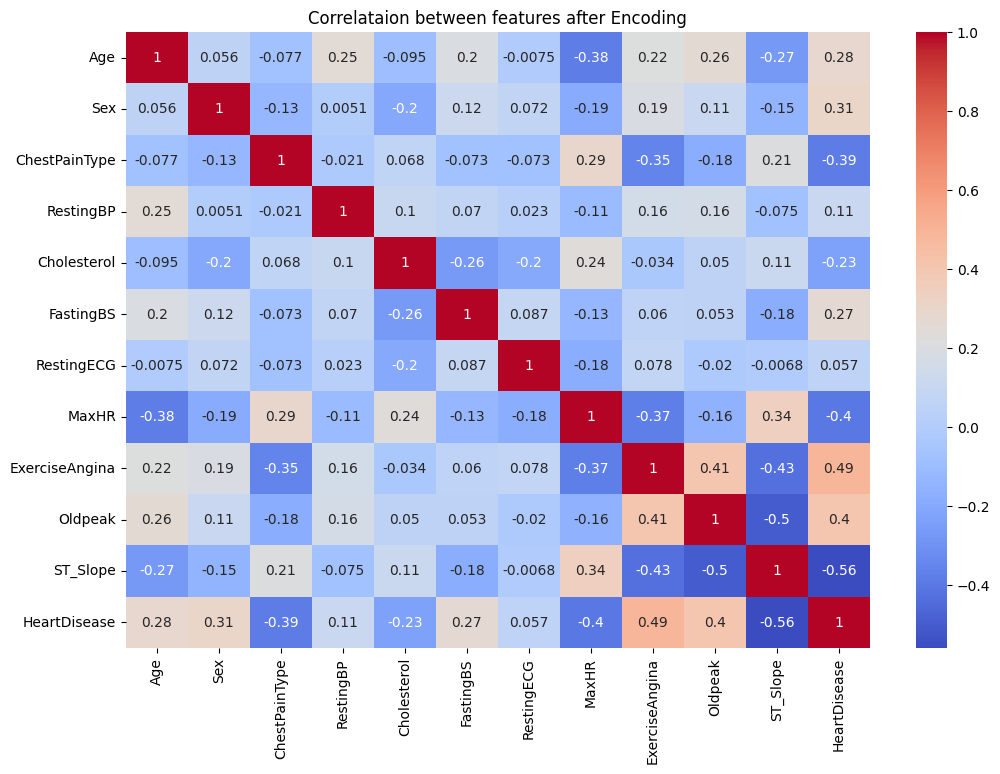

In [6]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlataion between features after Encoding')
plt.show()

In [7]:
df_dict = corr['HeartDisease'].sort_values(ascending=True).to_dict()
sig_feature = [feature for feature, corr_value in df_dict.items() if abs(corr_value) >=0.4 and feature != 'HeartDisease']
sig_feature

['ST_Slope', 'MaxHR', 'Oldpeak', 'ExerciseAngina']

In [8]:
mms = MinMaxScaler()

Membuat Model untuk Semua Feature

In [9]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
model_gr = GradientBoostingClassifier()
model_gr.fit(X_train_scaled, y_train)



GradientBoostingClassifier()

Prediksi dengan kedua model

In [10]:
y_rf_pred = model_rf.predict(X_test_scaled)
y_gr_pred = model_gr.predict(X_test_scaled)

Pengujian Model RandomForrest All Feature

In [11]:
print("Confusion Matrix All Feature Random Forrest:\n", confusion_matrix(y_test, y_rf_pred))
print("\nClassification Report All Feature Random Forrest:\n", classification_report(y_test, y_rf_pred))
print("\nAccuracy Score All Feature Random Forrest:", accuracy_score(y_test, y_rf_pred))

Confusion Matrix All Feature Random Forrest:
 [[68  9]
 [11 96]]

Classification Report All Feature Random Forrest:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Accuracy Score All Feature Random Forrest: 0.8913043478260869


Pengujian Model Gradient Boosting All Feature

In [12]:
print("Confusion Matrix All Feature Gardient Boosting:\n", confusion_matrix(y_test, y_gr_pred))
print("\nClassification Report All Feature Gardient Boosting:\n", classification_report(y_test, y_gr_pred))
print("\nAccuracy Score All Feature Gardient Boosting:", accuracy_score(y_test, y_gr_pred))

Confusion Matrix All Feature Gardient Boosting:
 [[69  8]
 [15 92]]

Classification Report All Feature Gardient Boosting:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184


Accuracy Score All Feature Gardient Boosting: 0.875


Membuat Model untuk Feature Signifikan


In [13]:
X = df[sig_feature]
y = df['HeartDisease']
X_sig_train,X_sig_test,y_sig_train,y_sig_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_sig_train_scaled = mms.fit_transform(X_sig_train)
X_sig_test_scaled = mms.transform(X_sig_test)
model_sig_rf = RandomForestClassifier()
model_sig_rf.fit(X_sig_train_scaled, y_sig_train)
model_sig_gr = GradientBoostingClassifier()
model_sig_gr.fit(X_sig_train_scaled, y_sig_train)

GradientBoostingClassifier()

Prediksi dengan Kedua Model

In [14]:
y_sig_pred_rf = model_sig_rf.predict(X_sig_test_scaled)
y_sig_pred_gr = model_sig_gr.predict(X_sig_test_scaled)

Pengujian Perfoma Model RF dengan Significant Feature

In [15]:
print("Confusion Matrix Significant Feature Random Forrest:\n", confusion_matrix(y_sig_test, y_sig_pred_rf))
print("\nClassification Report Significant Feature Random Forrest:\n", classification_report(y_sig_test, y_sig_pred_rf))
print("\nAccuracy Score Significant Feature Random Forrest:", accuracy_score(y_sig_test, y_sig_pred_rf))

Confusion Matrix Significant Feature Random Forrest:
 [[60 17]
 [29 78]]

Classification Report Significant Feature Random Forrest:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        77
           1       0.82      0.73      0.77       107

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.75      0.75       184


Accuracy Score Significant Feature Random Forrest: 0.75


Pengujian Perfoma Model Gradient Boostin dengan Significant Feature

In [16]:
print("Confusion Matrix Significant Feature Gradient Boosting:\n", confusion_matrix(y_sig_test, y_sig_pred_gr))
print("\nClassification Report Significant Feature Gradient Boosting:\n", classification_report(y_sig_test, y_sig_pred_gr))
print("\nAccuracy Score Significant Feature Gradient Boosting:", accuracy_score(y_sig_test, y_sig_pred_gr))

Confusion Matrix Significant Feature Gradient Boosting:
 [[64 13]
 [23 84]]

Classification Report Significant Feature Gradient Boosting:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        77
           1       0.87      0.79      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184


Accuracy Score Significant Feature Gradient Boosting: 0.8043478260869565


In [17]:
acc_dict ={"All Feature Random Forrest":accuracy_score(y_test, y_rf_pred),
           "All Feature Gradient Boosting":accuracy_score(y_test, y_gr_pred),
           "Significant Feature Random Forrest":accuracy_score(y_sig_test, y_sig_pred_rf),
           "Significant Feature Gradient Boosting":accuracy_score(y_sig_test, y_sig_pred_gr)
          }

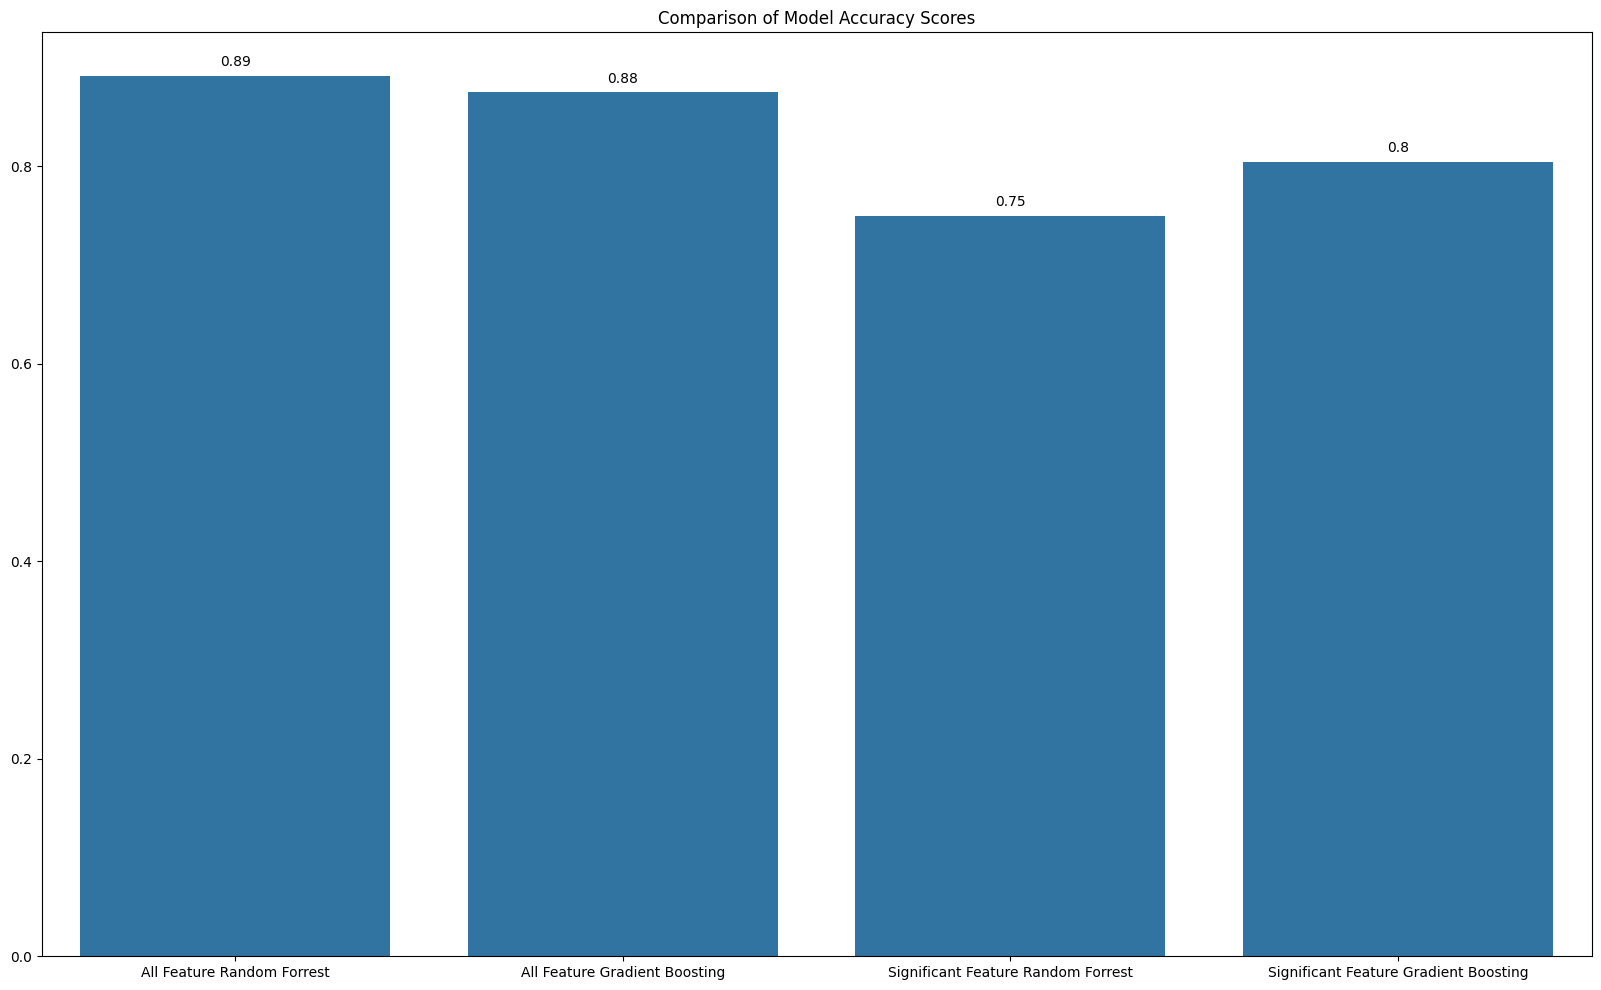

In [18]:
plt.figure(figsize=(20,12))
sns.barplot(x=list(acc_dict.keys()),y=list(acc_dict.values()))
for i,v in enumerate(acc_dict.values()):
    plt.text(i,v+0.01, str(round(v,2)), color='black', ha='center')
plt.title('Comparison of Model Accuracy Scores')
plt.show()

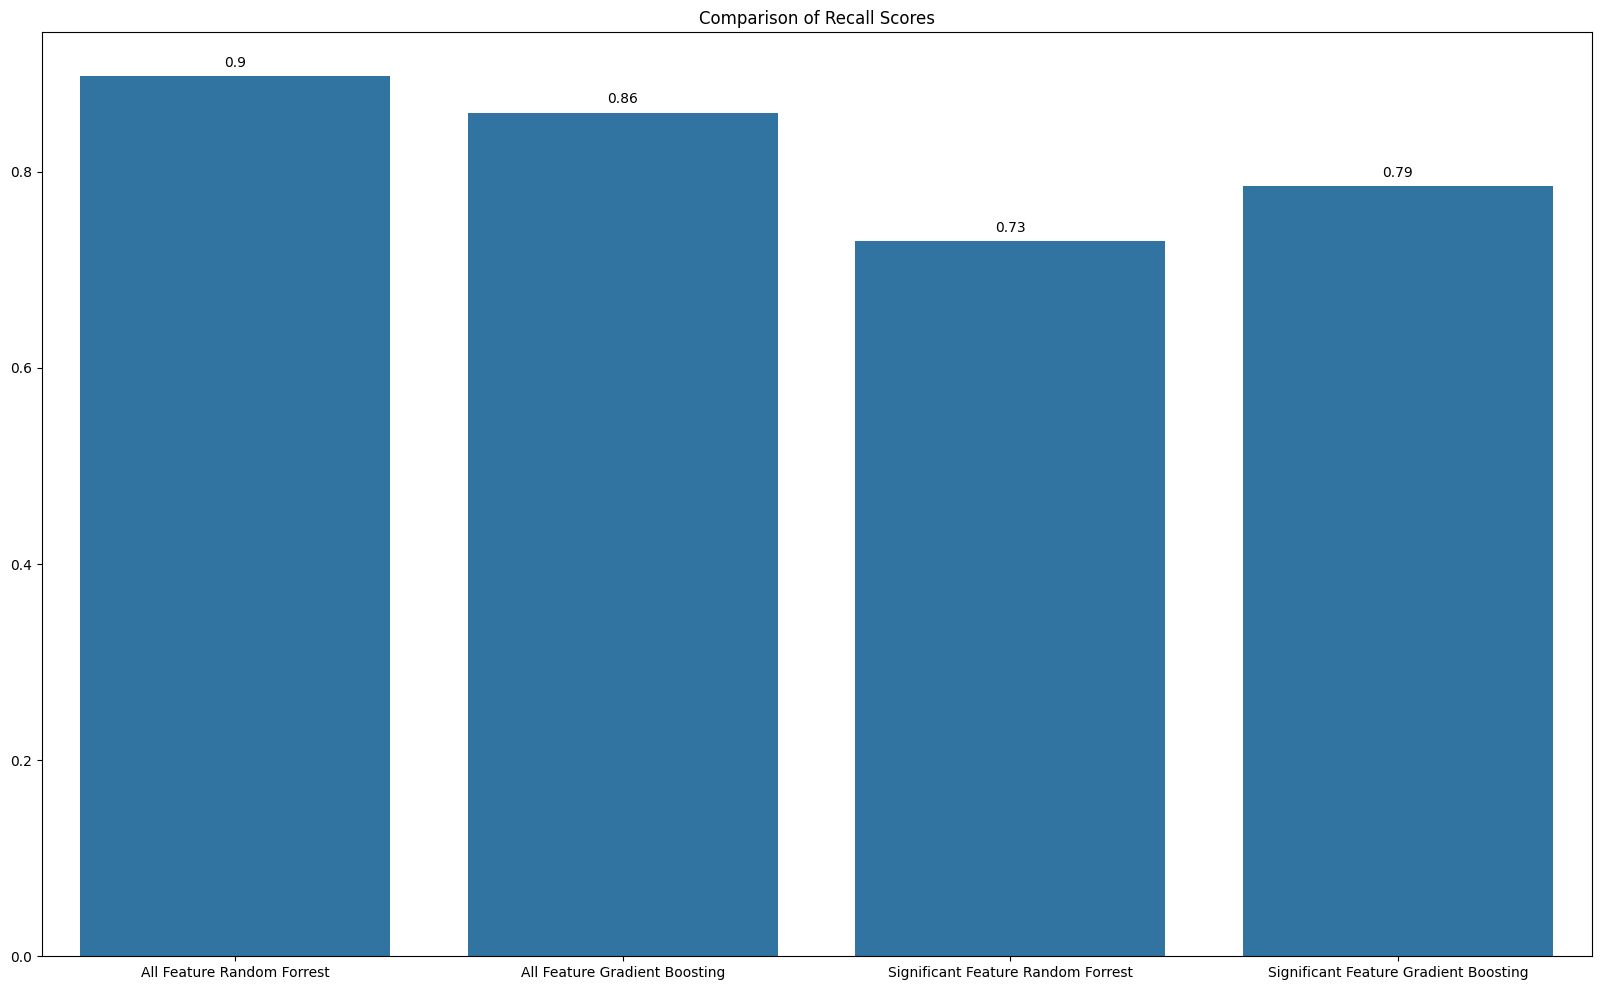

In [19]:
recall_dict ={"All Feature Random Forrest":recall_score(y_test, y_rf_pred),
           "All Feature Gradient Boosting":recall_score(y_test, y_gr_pred),
           "Significant Feature Random Forrest":recall_score(y_sig_test, y_sig_pred_rf),
           "Significant Feature Gradient Boosting":recall_score(y_sig_test, y_sig_pred_gr)
          }

plt.figure(figsize=(20,12))
sns.barplot(x=list(recall_dict.keys()),y=list(recall_dict.values()))
for i,v in enumerate(recall_dict.values()):
    plt.text(i,v+0.01, str(round(v,2)), color='black', ha='center')
plt.title('Comparison of Recall Scores')
plt.show()

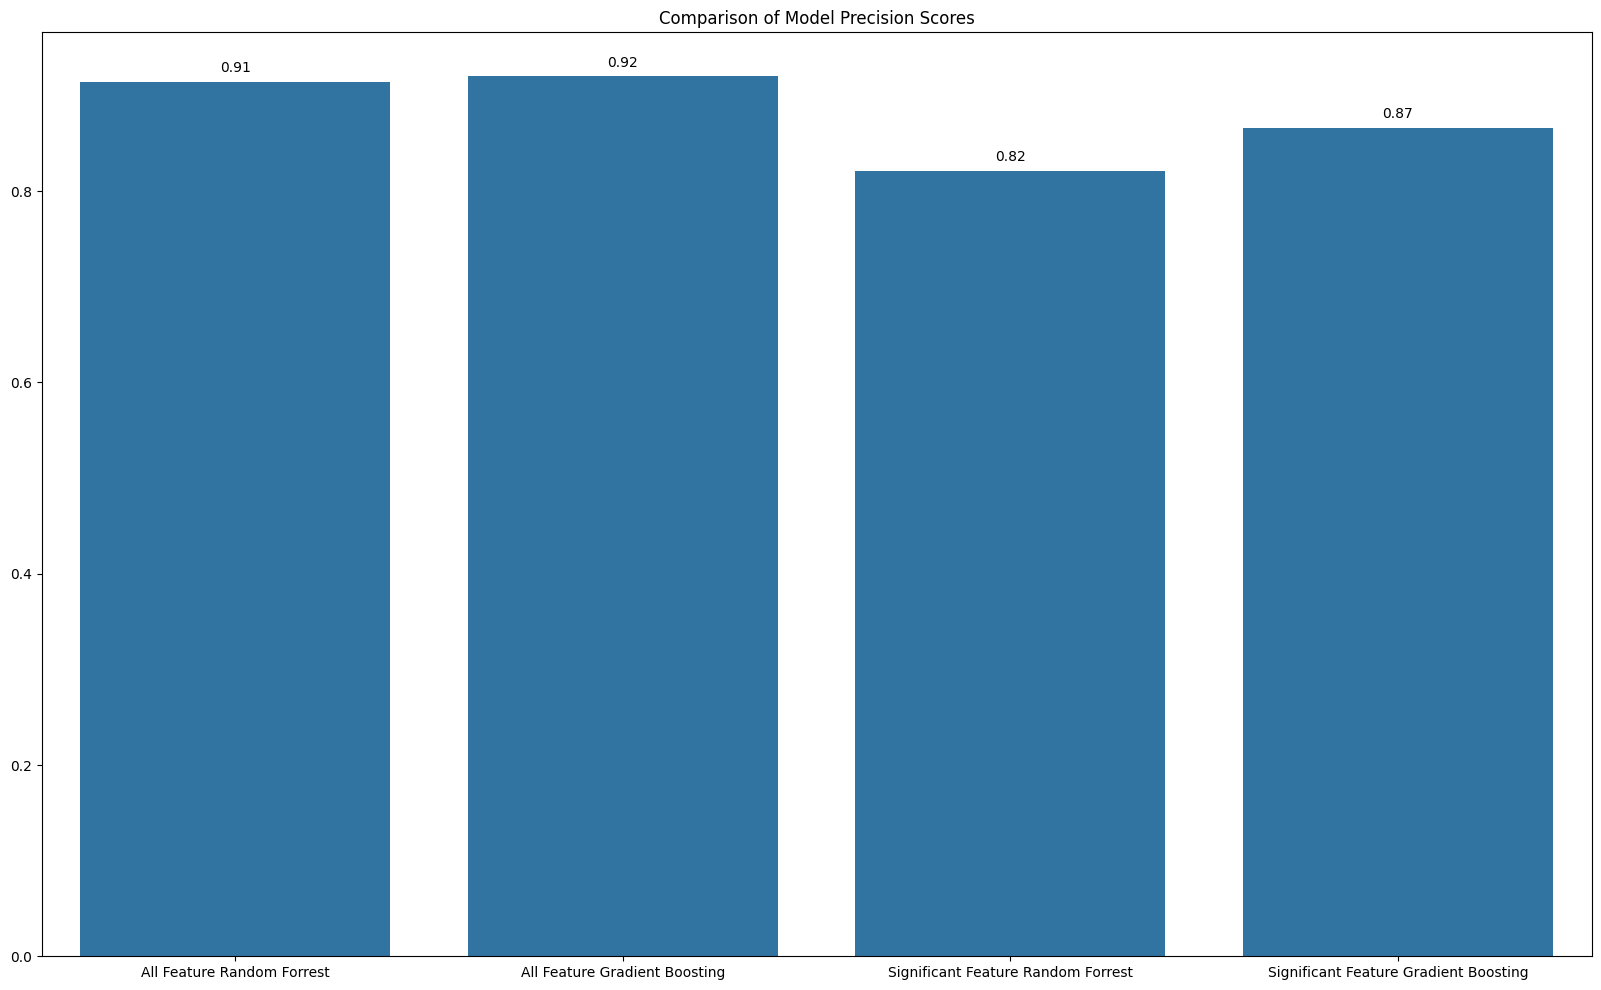

In [20]:
precision_dict ={"All Feature Random Forrest":precision_score(y_test, y_rf_pred),
           "All Feature Gradient Boosting":precision_score(y_test, y_gr_pred),
           "Significant Feature Random Forrest":precision_score(y_sig_test, y_sig_pred_rf),
           "Significant Feature Gradient Boosting":precision_score(y_sig_test, y_sig_pred_gr)
          }

plt.figure(figsize=(20,12))
sns.barplot(x=list(precision_dict.keys()),y=list(precision_dict.values()))
for i,v in enumerate(precision_dict.values()):
    plt.text(i,v+0.01, str(round(v,2)), color='black', ha='center')
plt.title('Comparison of Model Precision Scores')
plt.show()

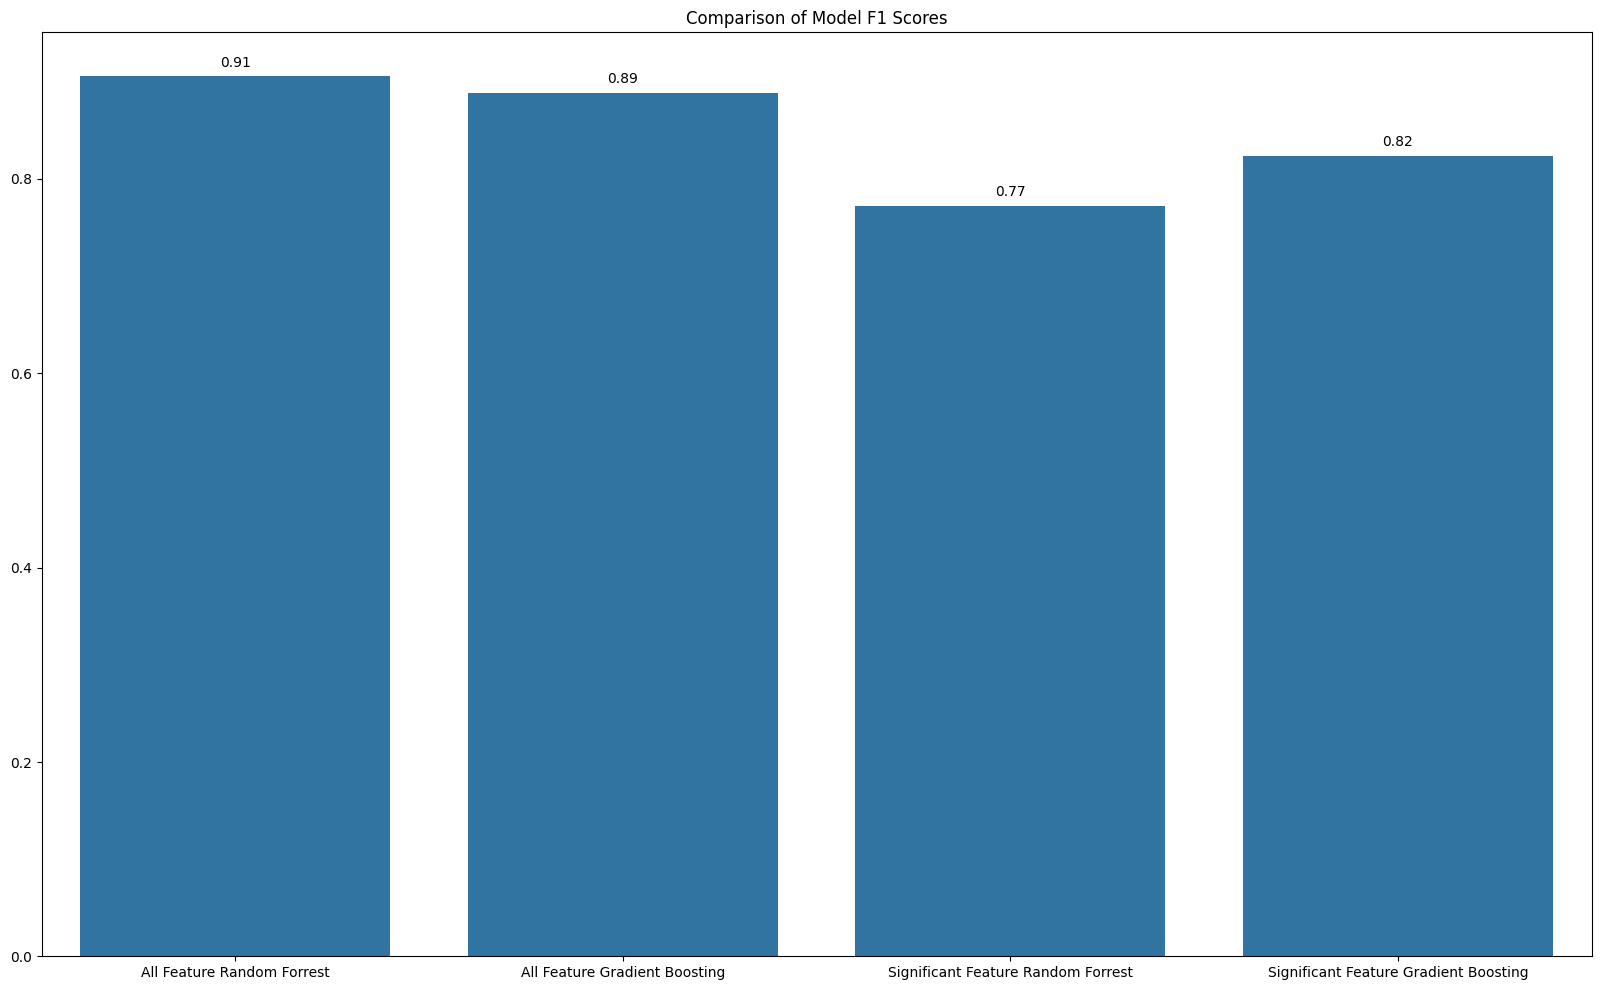

In [21]:
f1_dict ={"All Feature Random Forrest":f1_score(y_test, y_rf_pred),
           "All Feature Gradient Boosting":f1_score(y_test, y_gr_pred),
           "Significant Feature Random Forrest":f1_score(y_sig_test, y_sig_pred_rf),
           "Significant Feature Gradient Boosting":f1_score(y_sig_test, y_sig_pred_gr)
          }

plt.figure(figsize=(20,12))
sns.barplot(x=list(f1_dict.keys()),y=list(f1_dict.values()))
for i,v in enumerate(f1_dict.values()):
    plt.text(i,v+0.01, str(round(v,2)), color='black', ha='center')
plt.title('Comparison of Model F1 Scores')
plt.show()

In [22]:
import joblib

In [23]:
joblib.dump(model_rf, 'rf_model_all_features.pkl')
joblib.dump(model_gr, 'gb_model_all_features.pkl')
joblib.dump(mms,'minmax_scaler.pkl')
joblib.dump(encoders,'label_encoders.pkl')


['label_encoders.pkl']